# Flare 2013/06/30

In [1]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')
import use_nessi as un


In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import matplotlib.cm as cm


In [3]:

# print the updated sys.path
print('Updated sys.path:', sys.path)

Updated sys.path: ['d:\\solar flares\\data\\2013-06-30', 'c:\\Users\\Gebruiker\\Anaconda3\\python311.zip', 'c:\\Users\\Gebruiker\\Anaconda3\\DLLs', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib', 'c:\\Users\\Gebruiker\\Anaconda3', '', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Gebruiker\\Anaconda3\\Lib\\site-packages\\Pythonwin', 'D:/solar flares/data/2017-09-06']


In [4]:
f = rs('tseries_6563_09_15_50_calib.sav')
f.keys(), f['time']

(dict_keys(['tstep', 'clip', 'tile', 'scale', 'ang', 'shift', 'grid', 'time', 'date', 'wfiles', 'tmean', 'crop']),
 array([b'09:15:54.254', b'09:16:01.529', b'09:16:09.809', b'09:16:23.249',
        b'09:16:35.418', b'09:16:43.006', b'09:16:50.272', b'09:16:57.537',
        b'09:17:04.801', b'09:17:12.078', b'09:17:19.339', b'09:17:26.627',
        b'09:17:33.865', b'09:17:41.148', b'09:17:48.398', b'09:17:55.667',
        b'09:18:02.920', b'09:18:10.176', b'09:18:17.466', b'09:18:24.713',
        b'09:18:31.983', b'09:18:39.329', b'09:18:46.614', b'09:18:53.861',
        b'09:19:01.122', b'09:19:08.377', b'09:19:15.658', b'09:19:22.940',
        b'09:19:30.229', b'09:19:37.517', b'09:19:44.781', b'09:19:52.023',
        b'09:19:59.291', b'09:20:06.565', b'09:20:13.817', b'09:20:21.117',
        b'09:20:28.394', b'09:20:35.646', b'09:20:42.925', b'09:20:50.240',
        b'09:20:57.532', b'09:21:04.793', b'09:21:12.074', b'09:21:19.342',
        b'09:21:26.651', b'09:21:33.918', b'09:21

np.shape(self.datacube) (504, 1, 33, 970, 964)

(970, 964) (970, 964)
Boundary
Blue=Outside, yellow=Inside


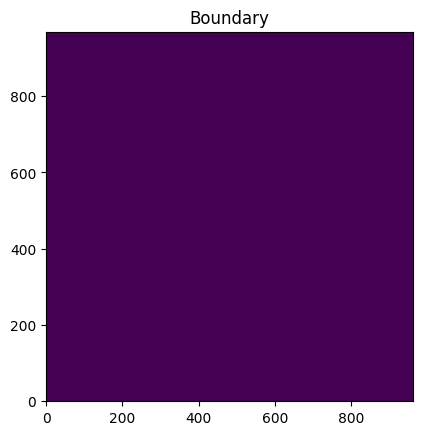

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


((504, 1, 33, 970, 964),
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]))

In [5]:
reload(un)
#  %matplotlib inline
Ha = un.SST_data(name_of_line="Ha13", filename_fits='crispex_6563_09_15_50_time_corrected.fits',
                 spectfilename='spectfile_6563.idlsave',
                 timesfilename='tseries_6563_09_15_50_calib.sav', thresh=[1000, 50000], boundary_methode='No Boundary')

# Ha.datacube
np.shape(Ha.datacube), Ha.boundary[10:20:5, 100:200:30]


In [6]:
np.max(Ha.datacube[0,0,:,:,:]), np.min(Ha.datacube[0,0,:,:,:])

(29596, 1775)

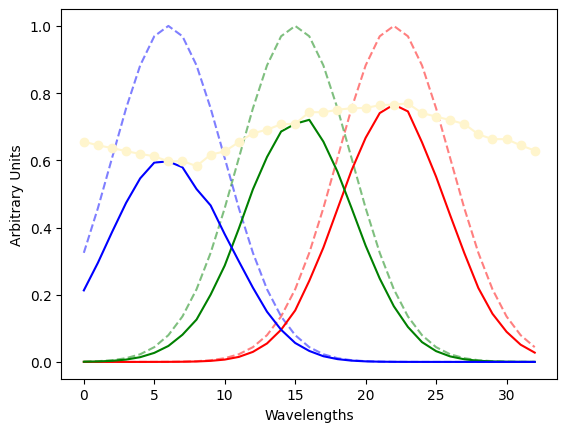

In [7]:
# %matplotlib inline
Ha.update_filters([[22,4], [15,4], [6,4]])
Ha.plot_filt(880,900)
plt.show()

In [8]:
# from cocoplot import RGB

# data_float = RGB(datacube, filter = Ha._filt, threshold=Ha._thresh, thresmethod='percentile')
# data_int = norm(data_float)
# np.uint8(np.round(data*255./np.max(data)))

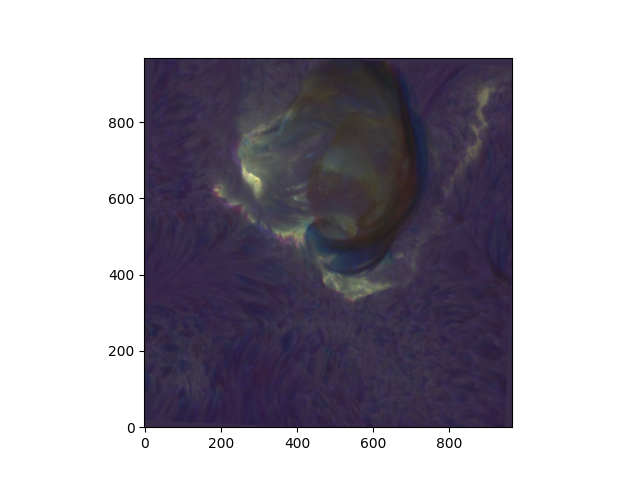

(970, 964, 3)


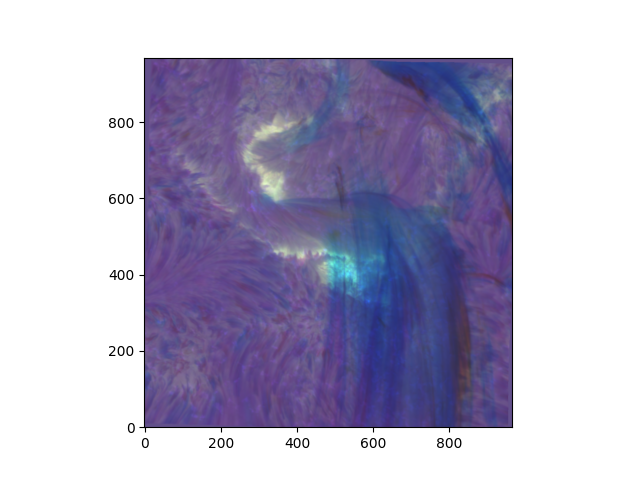

(970, 964, 3)


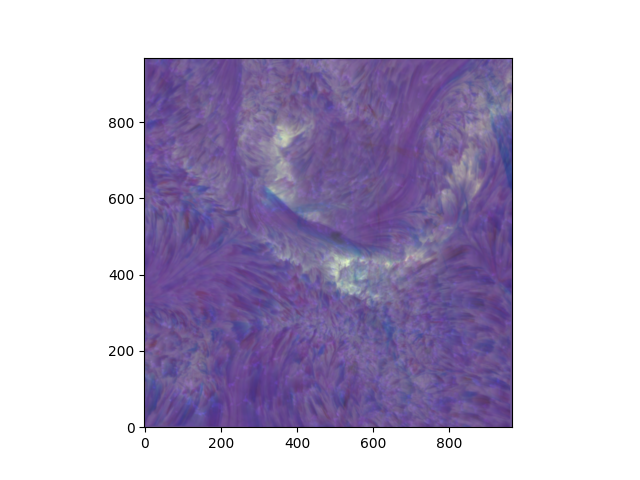

(970, 964, 3)


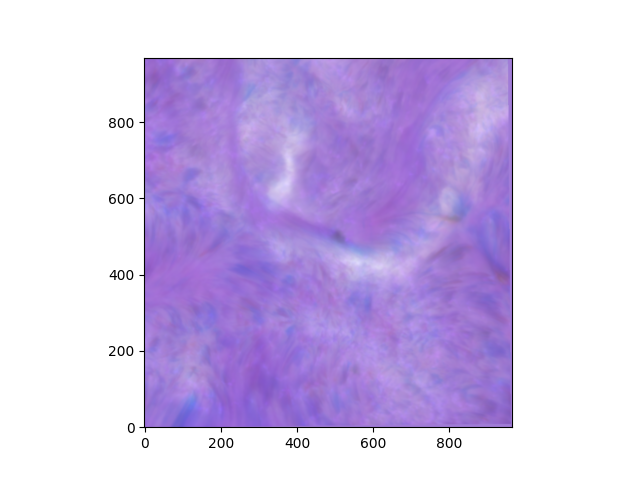

(970, 964, 3)


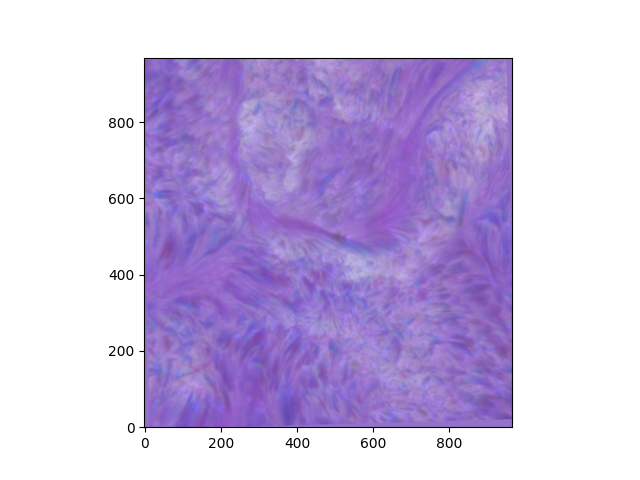

(970, 964, 3)


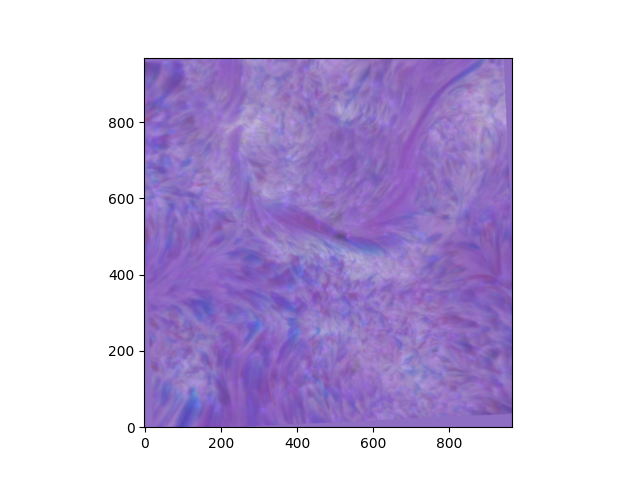

(970, 964, 3)


In [9]:
for frame in range(0,Ha._number_of_frames, 100):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    plt.imshow(Ha.current_ccp, origin='lower')

    # plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary[::-1,:]))

COCOPLOT at  t=09:15:54 UT (frame number 0 )


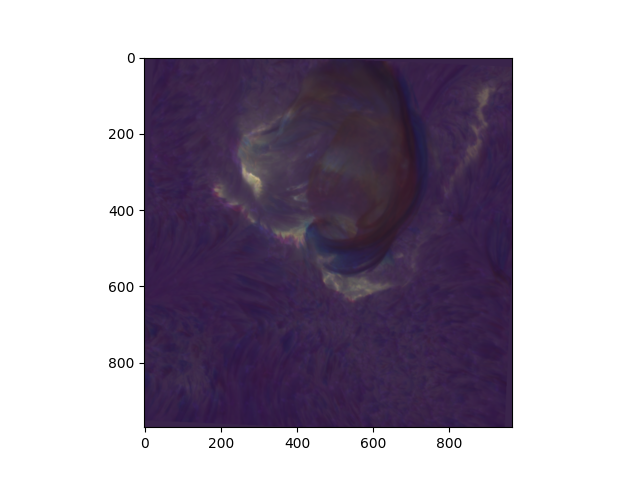

COCOPLOT at  t=09:20:57 UT (frame number 40 )


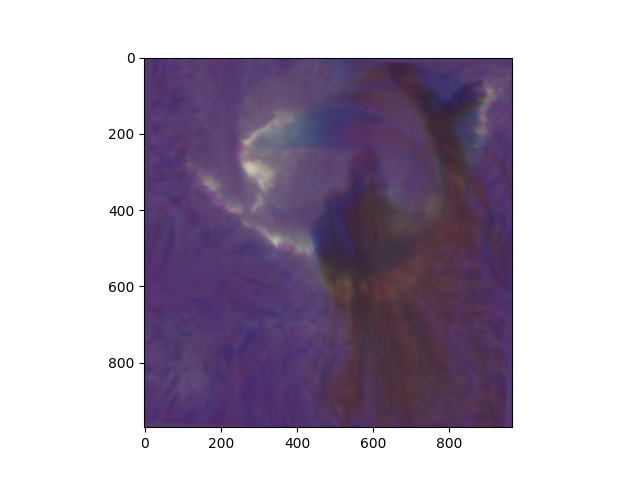

COCOPLOT at  t=09:25:48 UT (frame number 80 )


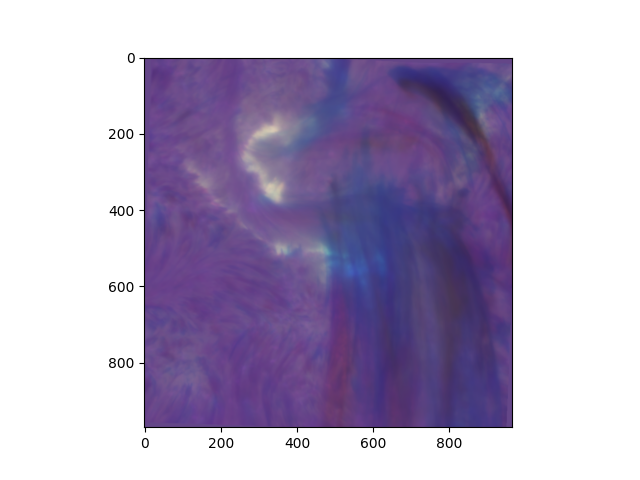

COCOPLOT at  t=09:30:39 UT (frame number 120 )


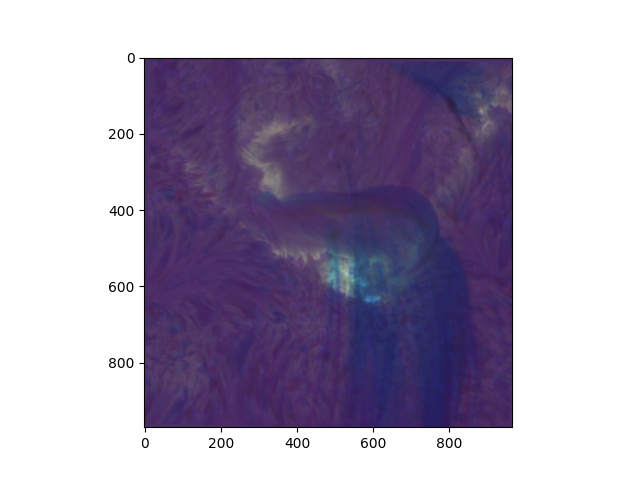

COCOPLOT at  t=09:35:30 UT (frame number 160 )


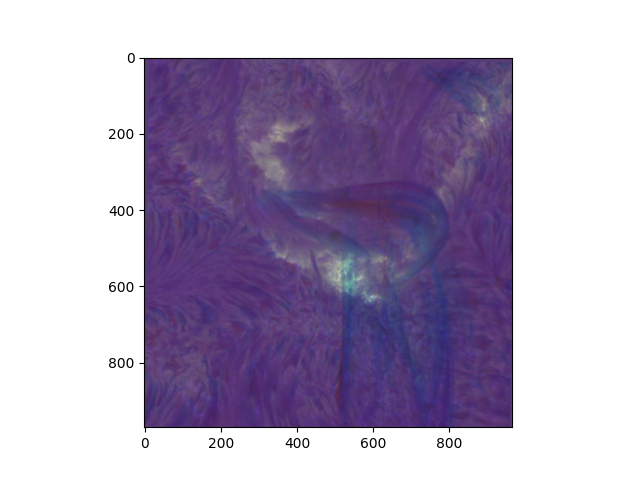

COCOPLOT at  t=09:40:24 UT (frame number 200 )


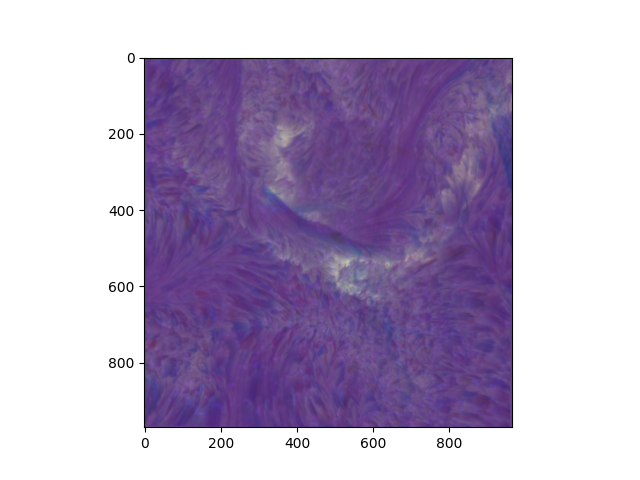

COCOPLOT at  t=09:45:15 UT (frame number 240 )


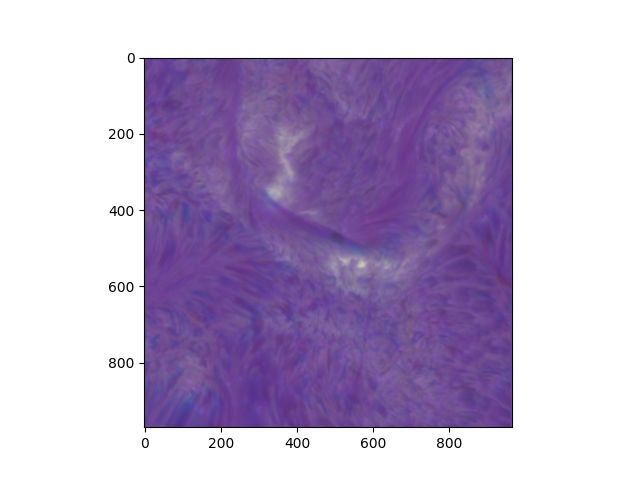

COCOPLOT at  t=09:50:09 UT (frame number 280 )


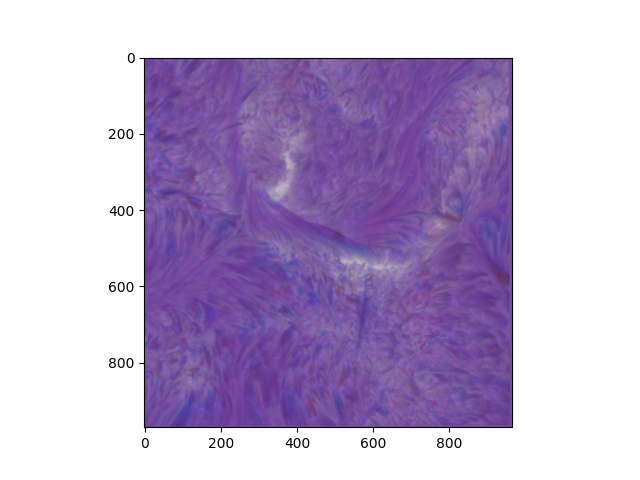

COCOPLOT at  t=09:55:00 UT (frame number 320 )


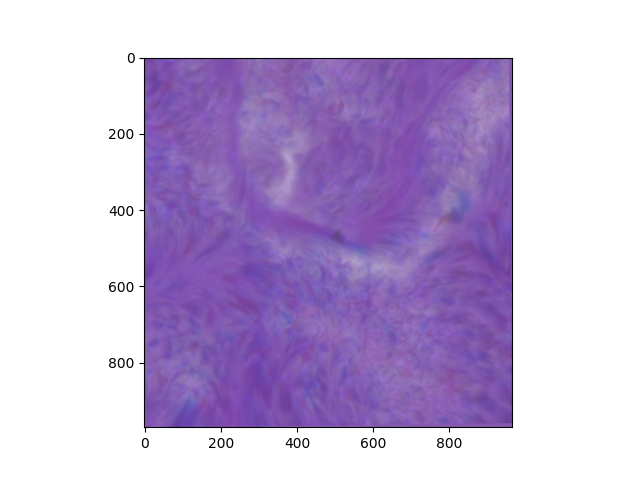

COCOPLOT at  t=09:59:50 UT (frame number 360 )


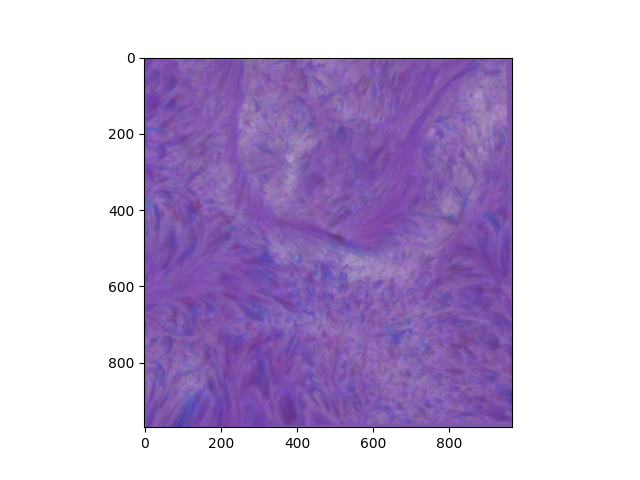

COCOPLOT at  t=10:04:41 UT (frame number 400 )


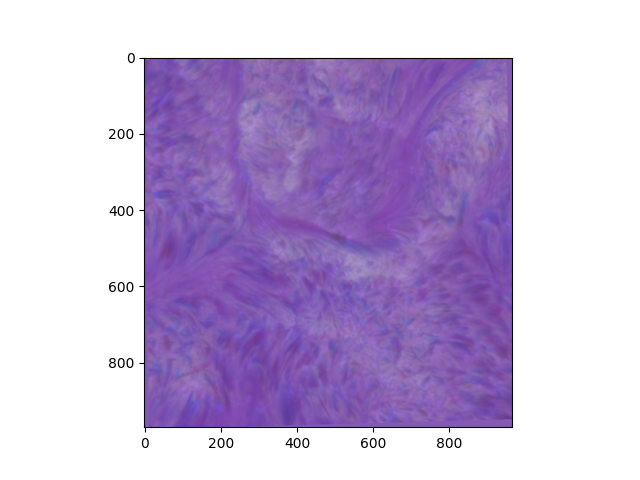

COCOPLOT at  t=10:09:36 UT (frame number 440 )


In [10]:
# Many COCOPLOTS
r = Ha._number_of_frames
for i in range(0,r,40):
    tstr = Ha.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    Ha.ccp_frame(i,Show=False)
    plt.imshow(Ha.current_ccp[::-1,:])

    plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
    plt.show()